# Plots for STRise conference

## Setup

In [1]:
## append ../scripts to path
import os
import sys

# Only append if not already in path
project_dir = os.path.dirname(os.path.dirname(os.getcwd()))
if not os.path.join(project_dir, "workflow/scripts") in sys.path:
    sys.path.append(os.path.join(project_dir, "workflow/scripts"))
print(f"Project directory: {project_dir}")

Project directory: /home/bobby/projects/pci-pmi-2030-targets


In [2]:
import logging
logger = logging.getLogger(__name__)
import pypsa
import pandas as pd
import yaml

In [3]:
# Additional functions from commons
from common import add_carrier_groups, fill_missing_carriers

## Model results

In [4]:
configfile = str(project_dir) + "/config/config.yaml"
config= yaml.safe_load(open(configfile))

prefix = config["run"]["prefix"]
scenarios = config["run"]["name"]
print(f"Prefix: {prefix}")
print(f"Scenarios: {scenarios}")

# Overwrite scenarios
# scenarios = ["baseline", "baseline_extended", "scenario_a_targets_no_pipelines", "scenario_b_no_targets_no_pipelines"]

Prefix: 2030-targets-updated
Scenarios: ['baseline', 'baseline_extended', 'scenario_a_targets_no_pipelines', 'scenario_b_no_targets_no_pipelines', 'targets_greenfield_pipelines', 'baseline--5mth2', 'baseline_extended--5mth2', 'scenario_a_targets_no_pipelines--5mth2', 'targets_greenfield_pipelines--5mth2', 'baseline--gaspipeline_retrofit', 'baseline_extended--gaspipeline_retrofit', 'scenario_a_targets_no_pipelines--gaspipeline_retrofit', 'scenario_b_no_targets_no_pipelines--gaspipeline_retrofit', 'targets_greenfield_pipelines--gaspipeline_retrofit']


In [5]:
# iterate through all scenarios and store all pypsa networks in a dictionary with scenarios as keys
networks = {}
for scenario in scenarios:
    print("")
    print(f"Loading network for scenario {scenario}")
    n_path = project_dir + "/results/" + prefix+ "/"+scenario+"/postnetworks/base_s_90_lv1.05___2030.nc"
    networks[scenario] = pypsa.Network(n_path)

    # Drop carriers = "none"
    networks[scenario].carriers.drop("none",inplace=True)

    # Fill missing carriers
    fill_missing_carriers(networks[scenario])

    # Add carrier groups
    add_carrier_groups(networks[scenario], config)    


Loading network for scenario baseline


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario baseline_extended


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario scenario_a_targets_no_pipelines


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario scenario_b_no_targets_no_pipelines


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario targets_greenfield_pipelines


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario baseline--5mth2


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario baseline_extended--5mth2


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario scenario_a_targets_no_pipelines--5mth2


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario targets_greenfield_pipelines--5mth2


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario baseline--gaspipeline_retrofit


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario baseline_extended--gaspipeline_retrofit


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario scenario_a_targets_no_pipelines--gaspipeline_retrofit


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario scenario_b_no_targets_no_pipelines--gaspipeline_retrofit


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Loading network for scenario targets_greenfield_pipelines--gaspipeline_retrofit


INFO:pypsa.io:Imported network base_s_90_lv1.05___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [6]:
# print all objectives
for scenario in scenarios:
    print("")
    print(f"Objective value -- {scenario}")
    print(f"{round(networks[scenario].objective/1e9,3)} bn. EUR p.a.")


Objective value -- baseline
600.526 bn. EUR p.a.

Objective value -- baseline_extended
599.352 bn. EUR p.a.

Objective value -- scenario_a_targets_no_pipelines
606.446 bn. EUR p.a.

Objective value -- scenario_b_no_targets_no_pipelines
582.176 bn. EUR p.a.

Objective value -- targets_greenfield_pipelines
601.979 bn. EUR p.a.

Objective value -- baseline--5mth2
588.777 bn. EUR p.a.

Objective value -- baseline_extended--5mth2
587.945 bn. EUR p.a.

Objective value -- scenario_a_targets_no_pipelines--5mth2
593.163 bn. EUR p.a.

Objective value -- targets_greenfield_pipelines--5mth2
589.739 bn. EUR p.a.

Objective value -- baseline--gaspipeline_retrofit
600.374 bn. EUR p.a.

Objective value -- baseline_extended--gaspipeline_retrofit
599.585 bn. EUR p.a.

Objective value -- scenario_a_targets_no_pipelines--gaspipeline_retrofit
606.265 bn. EUR p.a.

Objective value -- scenario_b_no_targets_no_pipelines--gaspipeline_retrofit
582.382 bn. EUR p.a.

Objective value -- targets_greenfield_pipelin

# CO2 sequestration target reached?

In [7]:
n = networks[scenarios[0]]

In [8]:
n.stores[n.stores.carrier=="co2 sequestered"].e_nom.sum()/1e6

74.930799

In [9]:
for scenario in scenarios:
    n = networks[scenario]
    idx_co2_sequestered = n.stores[n.stores.carrier == "co2 sequestered"].index
    co2_sequestered = n.stores_t.e.loc[n.snapshots[-1], idx_co2_sequestered].sum()/1e6
    print(f"CO2 sequestered -- {scenario}")
    print(f"{round(co2_sequestered,3)} MtCO2 p.a.")
    print("")


CO2 sequestered -- baseline
50.0 MtCO2 p.a.

CO2 sequestered -- baseline_extended
50.0 MtCO2 p.a.

CO2 sequestered -- scenario_a_targets_no_pipelines
50.0 MtCO2 p.a.

CO2 sequestered -- scenario_b_no_targets_no_pipelines
28.205 MtCO2 p.a.

CO2 sequestered -- targets_greenfield_pipelines
50.0 MtCO2 p.a.

CO2 sequestered -- baseline--5mth2
67.262 MtCO2 p.a.

CO2 sequestered -- baseline_extended--5mth2
67.74 MtCO2 p.a.

CO2 sequestered -- scenario_a_targets_no_pipelines--5mth2
50.0 MtCO2 p.a.

CO2 sequestered -- targets_greenfield_pipelines--5mth2
50.0 MtCO2 p.a.

CO2 sequestered -- baseline--gaspipeline_retrofit
50.0 MtCO2 p.a.

CO2 sequestered -- baseline_extended--gaspipeline_retrofit
50.0 MtCO2 p.a.

CO2 sequestered -- scenario_a_targets_no_pipelines--gaspipeline_retrofit
50.0 MtCO2 p.a.

CO2 sequestered -- scenario_b_no_targets_no_pipelines--gaspipeline_retrofit
28.205 MtCO2 p.a.

CO2 sequestered -- targets_greenfield_pipelines--gaspipeline_retrofit
50.0 MtCO2 p.a.



# Electrolysers installed

In [10]:
for scenario in scenarios:
    n = networks[scenario]
    idx_electrolysers = n.links[n.links.carrier == "H2 Electrolysis"].index
    installed_electrolysers = n.links.p_nom_opt.loc[idx_electrolysers].sum()
    print(f"Electrolysers installed -- {scenario}")
    print(f"{round(installed_electrolysers,3)} MW")
    print("")

Electrolysers installed -- baseline
71676.968 MW

Electrolysers installed -- baseline_extended
72239.504 MW

Electrolysers installed -- scenario_a_targets_no_pipelines
69129.345 MW

Electrolysers installed -- scenario_b_no_targets_no_pipelines
0.059 MW

Electrolysers installed -- targets_greenfield_pipelines
73063.541 MW

Electrolysers installed -- baseline--5mth2
36056.421 MW

Electrolysers installed -- baseline_extended--5mth2
36141.353 MW

Electrolysers installed -- scenario_a_targets_no_pipelines--5mth2
35159.533 MW

Electrolysers installed -- targets_greenfield_pipelines--5mth2
36819.856 MW

Electrolysers installed -- baseline--gaspipeline_retrofit
71674.841 MW

Electrolysers installed -- baseline_extended--gaspipeline_retrofit
72239.471 MW

Electrolysers installed -- scenario_a_targets_no_pipelines--gaspipeline_retrofit
69132.915 MW

Electrolysers installed -- scenario_b_no_targets_no_pipelines--gaspipeline_retrofit
0.052 MW

Electrolysers installed -- targets_greenfield_pipeline

# Hydrogen produced

In [11]:
111.1*3 / (72 *8.760) * 8760

4629.166666666665

In [12]:
h2_energy_content = 33.33 # kWh/kg
for scenario in scenarios:
    n = networks[scenario]
    idx_electrolysers = n.links[n.links.carrier == "H2 Electrolysis"].index
    installed_electrolysers = n.links_t.p1

    h2_produced_mwh = n.links_t.p1.loc[:,idx_electrolysers].sum().sum()*(-1)
    h2_produced_t = h2_produced_mwh/h2_energy_content

    print(f"H2 produced -- {scenario}")
    print(f"{round(h2_produced_t/1e3,1)} kt p.a.")
    print(f"{round(h2_produced_mwh/1e6,1)} TWh p.a.")
    print("")

H2 produced -- baseline
3333.3 kt p.a.
111.1 TWh p.a.

H2 produced -- baseline_extended
3333.3 kt p.a.
111.1 TWh p.a.

H2 produced -- scenario_a_targets_no_pipelines
3333.3 kt p.a.
111.1 TWh p.a.

H2 produced -- scenario_b_no_targets_no_pipelines
0.0 kt p.a.
0.0 TWh p.a.

H2 produced -- targets_greenfield_pipelines
3333.3 kt p.a.
111.1 TWh p.a.

H2 produced -- baseline--5mth2
1666.7 kt p.a.
55.6 TWh p.a.

H2 produced -- baseline_extended--5mth2
1666.7 kt p.a.
55.6 TWh p.a.

H2 produced -- scenario_a_targets_no_pipelines--5mth2
1666.7 kt p.a.
55.6 TWh p.a.

H2 produced -- targets_greenfield_pipelines--5mth2
1666.7 kt p.a.
55.6 TWh p.a.

H2 produced -- baseline--gaspipeline_retrofit
3333.3 kt p.a.
111.1 TWh p.a.

H2 produced -- baseline_extended--gaspipeline_retrofit
3333.3 kt p.a.
111.1 TWh p.a.

H2 produced -- scenario_a_targets_no_pipelines--gaspipeline_retrofit
3333.3 kt p.a.
111.1 TWh p.a.

H2 produced -- scenario_b_no_targets_no_pipelines--gaspipeline_retrofit
0.0 kt p.a.
0.0 TWh p

# Plots

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

alpha = 1
region_alpha = 0.8

df = {}
objective = {}

for scenario, n in networks.items():
    capex = n.statistics.capex(nice_names=False)
    opex = n.statistics.opex(aggregate_time="sum", nice_names=False)

    print(scenario)
    print(capex.sum() + opex.sum() - n.statistics.installed_capex(nice_names=False).sum())

    costs = capex.add(opex, fill_value=0)
    costs = costs.droplevel(0)[lambda x: x > 0]
    costs = costs.groupby(costs.index).sum()

    key = n.meta["wildcards"]["run"]
    df[key] = costs
    objective[key] = n.objective

baseline
600525521451.8087
baseline_extended
599352277073.494
scenario_a_targets_no_pipelines
606446415121.9728
scenario_b_no_targets_no_pipelines
582176108993.5314
targets_greenfield_pipelines
601979125356.6257
baseline--5mth2
588776869343.2523
baseline_extended--5mth2
587945048925.3804
scenario_a_targets_no_pipelines--5mth2
593162745740.4723
targets_greenfield_pipelines--5mth2
589738519295.4819
baseline--gaspipeline_retrofit
600374468561.9064
baseline_extended--gaspipeline_retrofit
599585327699.5575
scenario_a_targets_no_pipelines--gaspipeline_retrofit
606265031118.954
scenario_b_no_targets_no_pipelines--gaspipeline_retrofit
582382459526.1893
targets_greenfield_pipelines--gaspipeline_retrofit
601673614020.1432


In [39]:
norm = 1e9
unit = "bn€/a"

In [40]:
df = pd.concat(df, axis=1)

In [42]:
objective = pd.Series(objective)
objective

baseline                                                    6.005255e+11
baseline_extended                                           5.993523e+11
scenario_a_targets_no_pipelines                             6.064464e+11
scenario_b_no_targets_no_pipelines                          5.821761e+11
targets_greenfield_pipelines                                6.019791e+11
baseline--5mth2                                             5.887769e+11
baseline_extended--5mth2                                    5.879450e+11
scenario_a_targets_no_pipelines--5mth2                      5.931627e+11
targets_greenfield_pipelines--5mth2                         5.897385e+11
baseline--gaspipeline_retrofit                              6.003745e+11
baseline_extended--gaspipeline_retrofit                     5.995853e+11
scenario_a_targets_no_pipelines--gaspipeline_retrofit       6.062650e+11
scenario_b_no_targets_no_pipelines--gaspipeline_retrofit    5.823825e+11
targets_greenfield_pipelines--gaspipeline_retrofit 

In [43]:
groups = networks[scenarios[0]].carriers.group
group_dict = dict(zip(groups.index, groups))
grouped = df.groupby(group_dict).sum().div(norm)
grouped

,baseline,baseline_extended,scenario_a_targets_no_pipelines,scenario_b_no_targets_no_pipelines,targets_greenfield_pipelines,baseline--5mth2,baseline_extended--5mth2,scenario_a_targets_no_pipelines--5mth2,targets_greenfield_pipelines--5mth2,baseline--gaspipeline_retrofit,baseline_extended--gaspipeline_retrofit,scenario_a_targets_no_pipelines--gaspipeline_retrofit,scenario_b_no_targets_no_pipelines--gaspipeline_retrofit,targets_greenfield_pipelines--gaspipeline_retrofit
carrier,,,,,,,,,,,,,,
Battery Infrastructure,0.421813,0.420575,0.865908,1.492838,0.487887,0.572886,0.564504,1.082167,0.928022,0.421656,0.420411,0.865482,1.492644,0.487626
Bioenergy,38.414860,38.343783,39.218093,40.194155,38.718801,39.076724,39.066760,39.699070,39.547852,38.415945,38.344753,39.218007,40.193691,38.720343
Boiler,50.576421,50.579233,50.383433,49.838562,50.424332,50.658186,50.667003,50.223934,50.504000,50.576007,50.577861,50.383173,49.838666,50.423475
CO$_2$ Infrastructure,9.906077,9.840424,0.058417,0.000017,0.774211,9.817772,9.800982,0.032263,0.438536,9.906201,9.840677,0.058418,0.000015,0.774125
Carbon Capt. at Point Sources,4.060956,3.851332,5.956796,3.213559,3.859563,4.424253,4.460263,5.057295,3.726788,4.060952,3.851388,5.956400,3.213553,3.859553
Coal,4.812508,4.033179,4.874981,4.529086,4.442806,4.914935,4.097754,4.690356,3.953438,4.657945,4.258722,4.682977,4.723970,4.142402
DAC,0.000018,0.000012,0.653140,0.000020,0.000017,0.000015,0.000013,0.561341,0.000014,0.000015,0.000016,0.653238,0.000017,0.000014
Electricity Grid,39.975615,40.014260,39.138522,39.870960,39.250812,39.971434,39.967811,39.296730,39.266538,39.975820,40.014304,39.138115,39.870573,39.250875
Electrolysis,13.531825,13.638021,13.051185,0.000011,13.793447,6.807075,6.823105,6.637825,6.951153,13.531764,13.638221,13.051862,0.000010,13.793479


In [32]:
colors = config["plotting"]["technology_group_colors"]

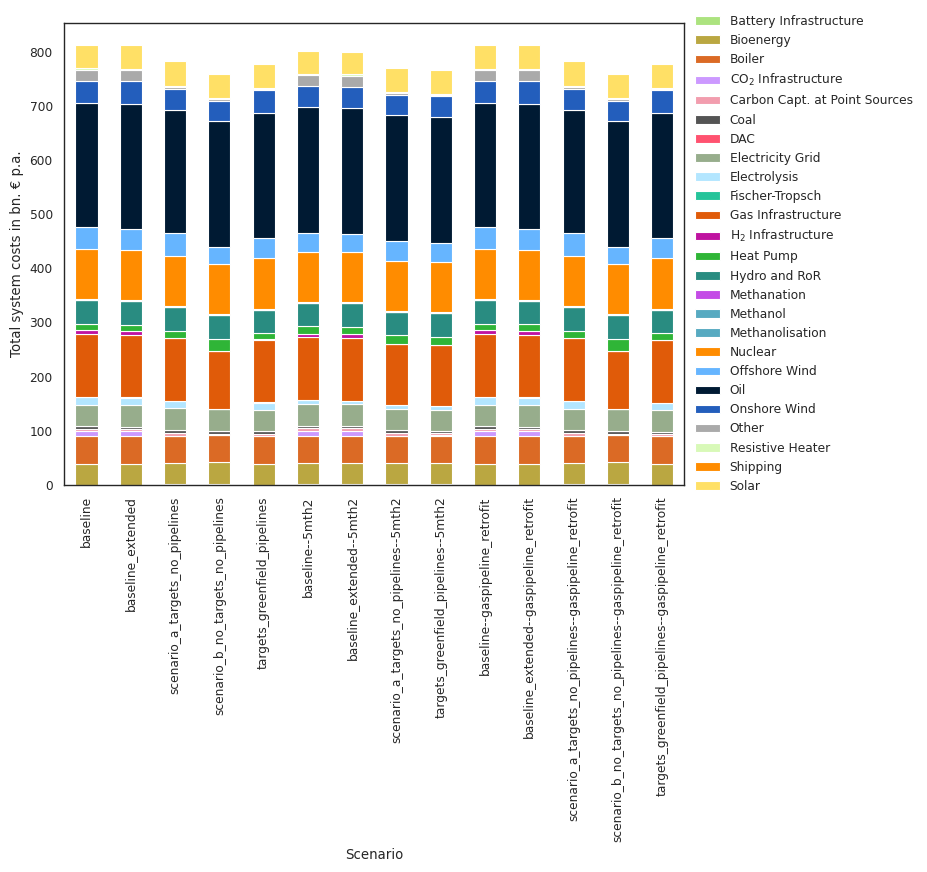

In [46]:
# Apply Seaborn style
sns.set_style("white")  # You can choose 'whitegrid', 'darkgrid', 'white', 'dark', or 'ticks'
sns.set_context("paper")  # Options: 'paper', 'notebook', 'talk', 'poster'
plt.rcParams['font.family'] = 'sans-serif'

# Assuming 'grouped' is your DataFrame and 'colors' is your list of colors
grouped.T.plot.bar(stacked=True, color=colors, figsize=(8, 6))

# Move the legend to the right

# Optional: add title, xlabel, ylabel
plt.title("")
plt.xlabel("Scenario")
plt.ylabel("Total system costs in bn. € p.a.")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# legend in two rows below
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=6, frameon=False)

plt.xticks(rotation=90)

# Show the plot
plt.show()